In [2]:
!pip install mxnet-cu100mkl

     |████████████████████████████████| 576.6MB 28kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


# __Generative Adversarial Networks - MXNet (From Scratch)__

In [0]:
import mxnet as mx
from mxnet import nd, autograd, gluon
import matplotlib.pyplot as plt

ctx = mx.gpu()

## __Getting the dataset__

In [0]:
def transform(data, label):
    return data.reshape((784)).astype('float32')/255.0

train_mnist = gluon.data.vision.MNIST(train = True, transform = transform)

In [7]:
image = train_mnist[1]
print(image.shape)

(784,)


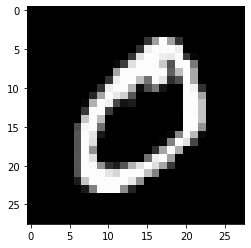

In [8]:
plt.imshow(image.reshape((28, 28)).asnumpy(), 'gray')
plt.show()

## __Creating data loader for training and testing__

In [0]:
batch_size = 64
training_data = gluon.data.DataLoader(train_mnist, batch_size = batch_size, shuffle = True)

## __Building the GAN model__

The GAN we are gonna build is a very toy model, so the final results are not gonna be earth shattering.

In [0]:
# ===================== Discriminator Parameters ===========================
dw1 = nd.random.normal(0, 1, (784, 128), ctx = ctx) * 0.001
db1 = nd.random.normal(0, 1, 128, ctx = ctx) * 0.001

dw2 = nd.random.normal(0, 1, (128, 1), ctx = ctx) * 0.001
db2 = nd.random.normal(0, 1, 1, ctx = ctx) * 0.001
# ==========================================================================

# ======================= Generator Parameters =============================
gw1 = nd.random.normal(0, 1, (100, 128), ctx = ctx) * 0.001
gb1 = nd.random.normal(0, 1, 128, ctx = ctx) * 0.001

gw2 = nd.random.normal(0, 1, (128, 784), ctx = ctx) * 0.001
gb2 = nd.random.normal(0, 1, 784, ctx = ctx) * 0.001
# ==========================================================================

def discriminator(x):
    layer1 = nd.relu(nd.dot(x, dw1) + db1)
    predicted = nd.sigmoid(nd.dot(layer1, dw2) + db2)
    return predicted

def generator(z):
    layer1 = nd.relu(nd.dot(z, gw1) + gb1)
    generated = nd.sigmoid(nd.dot(layer1, gw2) + gb2)
    return generated

dparams = [dw1, db1, dw2, db2]
gparams = [gw1, gb1, gw2, gb2]

# as we this is an scratch implementation, so we are gonna implement the optimizer from scratch too

dsqrs = [] # for adam optimizer
dvs = [] # for adam optimizer

gsqrs = [] # for adam optimizer
gvs = [] # for adam optimizer

for param in dparams:
    param.attach_grad()
    dsqrs.append(param.zeros_like() + 1e-5) # adding 1e-5 for computational stability
    dvs.append(param.zeros_like() + 1e-5) # adding 1e-5 for computational stability
    
for param in gparams:
    param.attach_grad()
    gsqrs.append(param.zeros_like() + 1e-5) # adding 1e-5 for computational stability
    gvs.append(param.zeros_like() + 1e-5) # adding 1e-5 for computational stability

In [0]:
def dloss(generated, true):
    return -nd.mean(nd.log(discriminator(true)) + nd.log(1 - discriminator(generated)))

def gloss(generated):
    return -nd.mean(nd.log(discriminator(generated)))

In [0]:
def adam(t, params, vs, sqrs, lr = 0.001):
    beta1 = 0.9
    beta2 = 0.999
    eps = 1e-8

    for param, v, sqr in zip(params, vs, sqrs):
        grad = param.grad / batch_size

        v[:] = beta1 * v + (1. - beta1) * grad
        sqr[:] = beta2 * sqr + (1. - beta2) * nd.square(grad + 1e-8)

        v_bias_corr = v / (1. - beta1 ** t)
        sqr_bias_corr = sqr / (1. - beta2 ** t)

        update = lr * v_bias_corr / (nd.sqrt(sqr_bias_corr + 1e-8) + eps)
        param[:] = param - update
        
def sgd(params, lr = 0.001):
    for param in params:
        param[:] = param - lr * param.grad

Epoch: 0 | Generator Loss: 2.32375 | Discirminator Loss: 0.81182


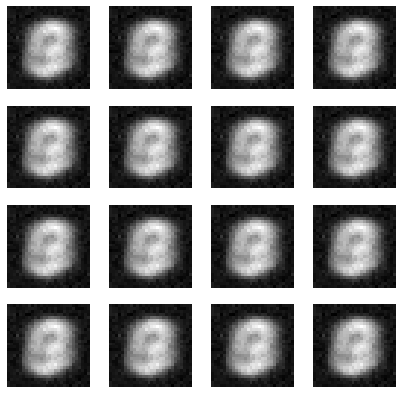

Epoch: 1 | Generator Loss: 5.87752 | Discirminator Loss: 0.01969


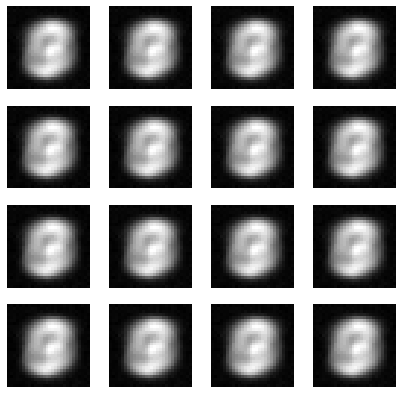

Epoch: 2 | Generator Loss: 4.10375 | Discirminator Loss: 0.20574


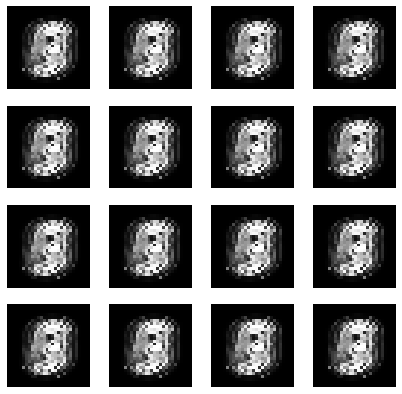

Epoch: 3 | Generator Loss: 3.69274 | Discirminator Loss: 0.27117


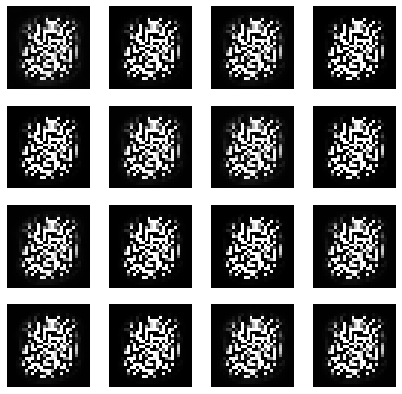

Epoch: 4 | Generator Loss: 5.12758 | Discirminator Loss: 0.03456


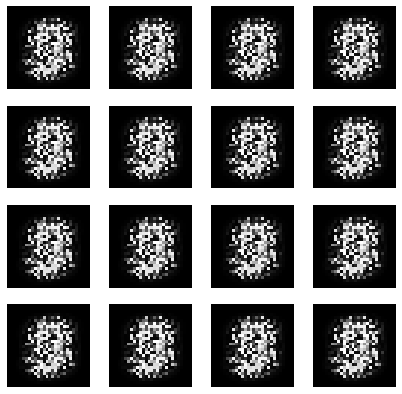

Epoch: 5 | Generator Loss: 4.14884 | Discirminator Loss: 0.16823


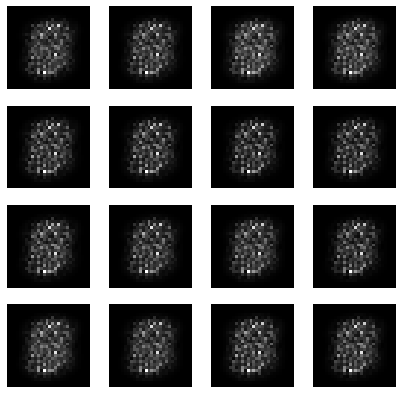

Epoch: 6 | Generator Loss: 3.38372 | Discirminator Loss: 0.19619


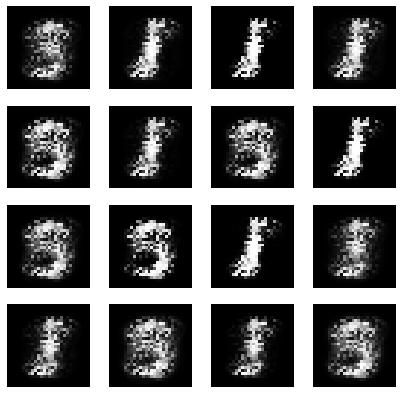

Epoch: 7 | Generator Loss: 3.90300 | Discirminator Loss: 0.18136


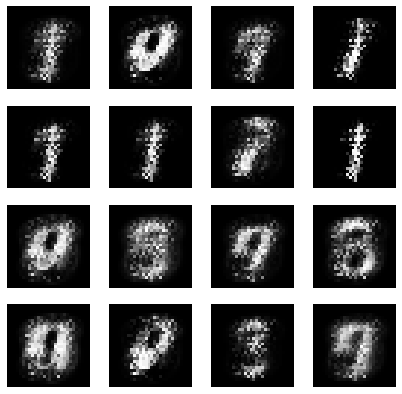

Epoch: 8 | Generator Loss: 3.79216 | Discirminator Loss: 0.23232


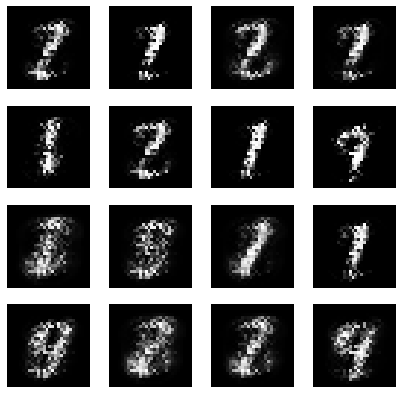

Epoch: 9 | Generator Loss: 3.82561 | Discirminator Loss: 0.28247


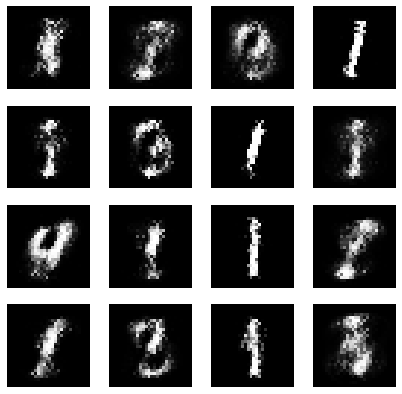

Epoch: 10 | Generator Loss: 3.61973 | Discirminator Loss: 0.41803


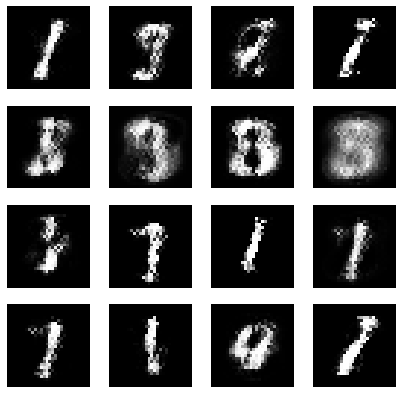

Epoch: 11 | Generator Loss: 3.48450 | Discirminator Loss: 0.42157


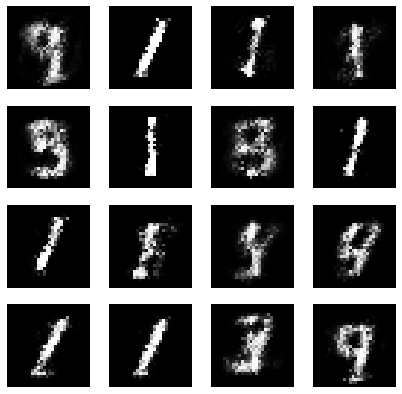

Epoch: 12 | Generator Loss: 3.39792 | Discirminator Loss: 0.49911


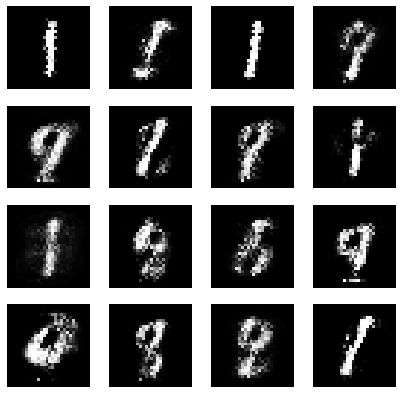

Epoch: 13 | Generator Loss: 3.18675 | Discirminator Loss: 0.61294


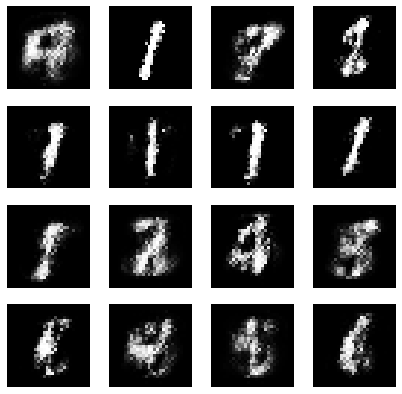

Epoch: 14 | Generator Loss: 3.18166 | Discirminator Loss: 0.66104


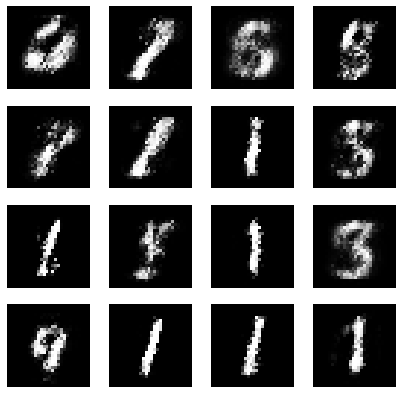

Epoch: 15 | Generator Loss: 3.08579 | Discirminator Loss: 0.75151


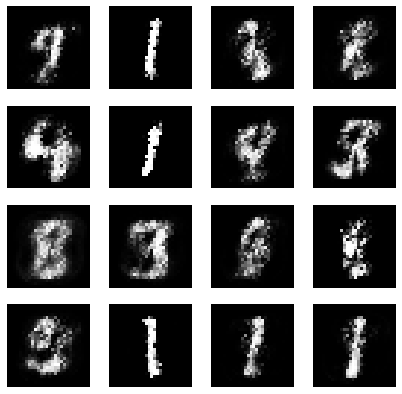

Epoch: 16 | Generator Loss: 2.89861 | Discirminator Loss: 0.82666


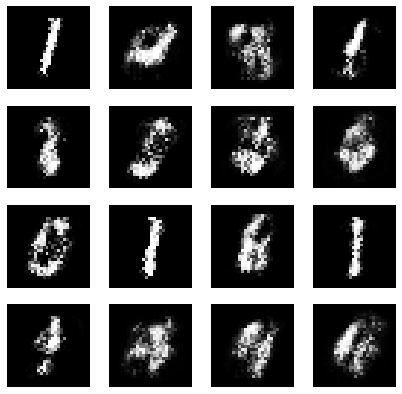

Epoch: 17 | Generator Loss: 3.04124 | Discirminator Loss: 0.82452


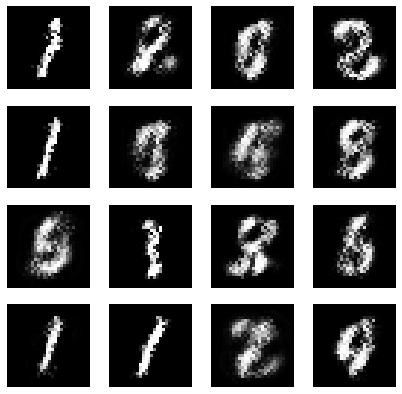

Epoch: 18 | Generator Loss: 2.93349 | Discirminator Loss: 0.85064


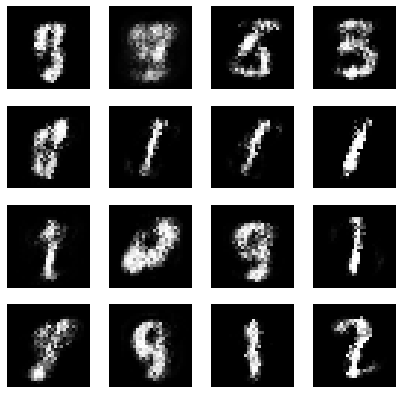

Epoch: 19 | Generator Loss: 2.50569 | Discirminator Loss: 0.92706


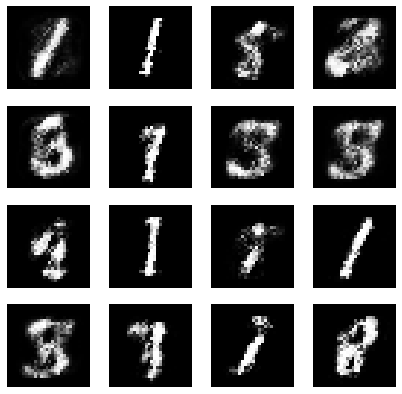

Epoch: 20 | Generator Loss: 2.37779 | Discirminator Loss: 0.93330


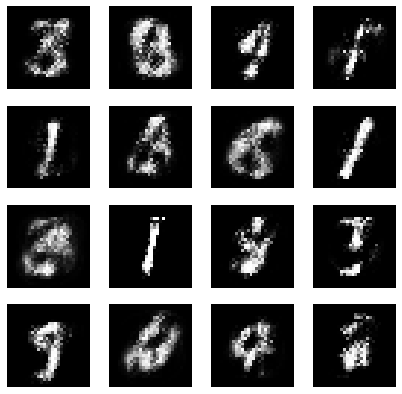

Epoch: 21 | Generator Loss: 2.30485 | Discirminator Loss: 0.91361


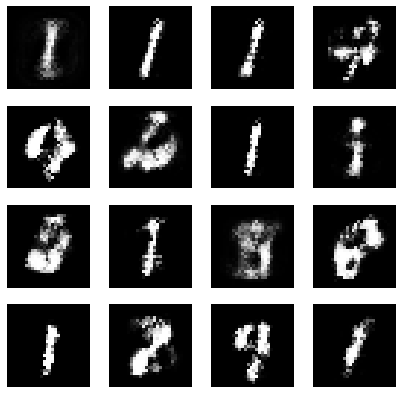

Epoch: 22 | Generator Loss: 2.40546 | Discirminator Loss: 0.95912


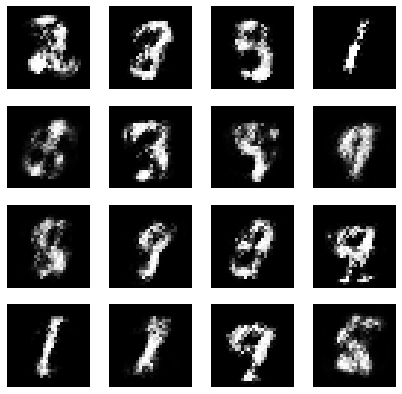

Epoch: 23 | Generator Loss: 2.20398 | Discirminator Loss: 1.00121


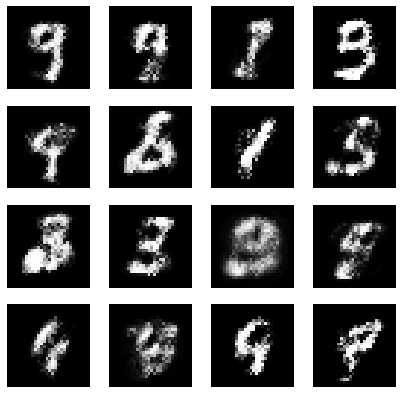

Epoch: 24 | Generator Loss: 2.01302 | Discirminator Loss: 1.05102


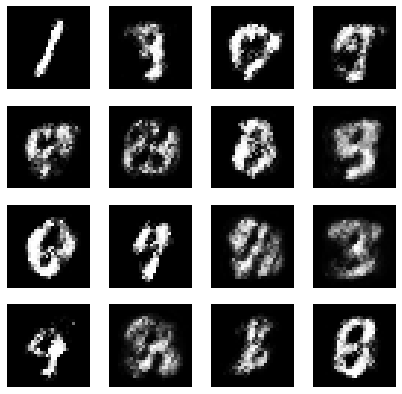

Epoch: 25 | Generator Loss: 1.97372 | Discirminator Loss: 1.04971


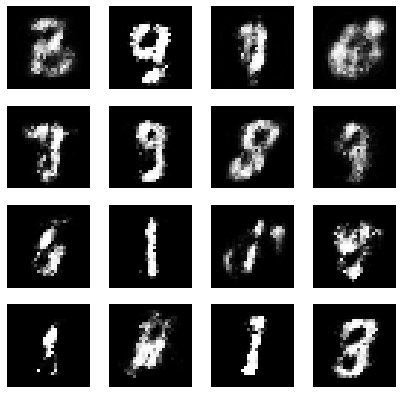

Epoch: 26 | Generator Loss: 1.91629 | Discirminator Loss: 1.03260


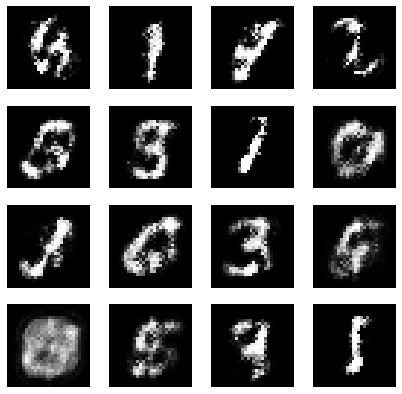

Epoch: 27 | Generator Loss: 1.92046 | Discirminator Loss: 1.03321


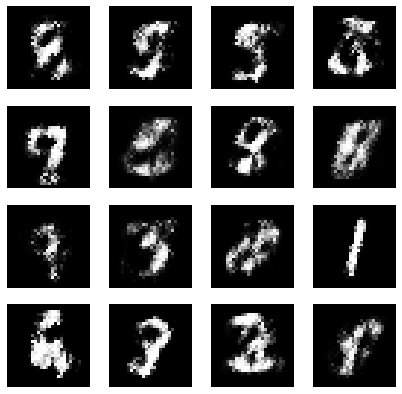

Epoch: 28 | Generator Loss: 1.86041 | Discirminator Loss: 1.01271


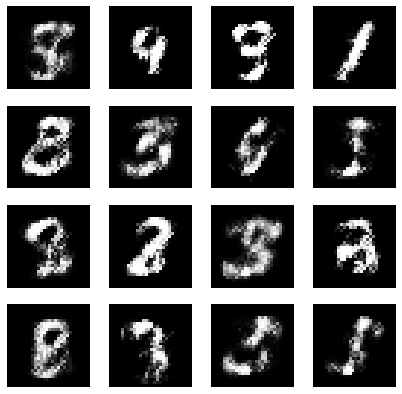

Epoch: 29 | Generator Loss: 1.71216 | Discirminator Loss: 1.03524


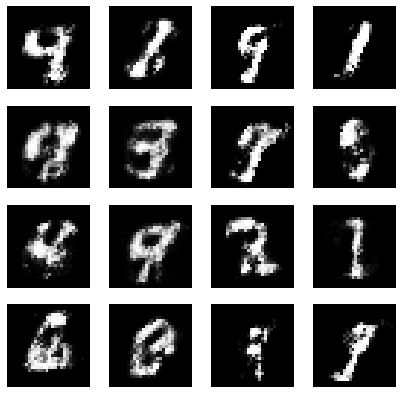

Epoch: 30 | Generator Loss: 1.62524 | Discirminator Loss: 1.06996


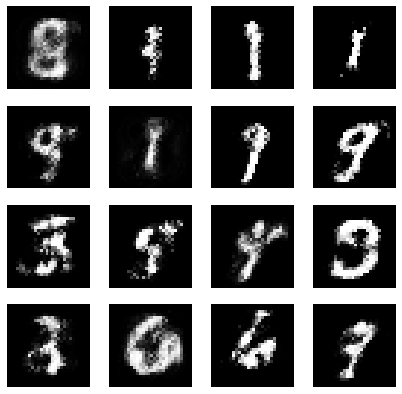

Epoch: 31 | Generator Loss: 1.64094 | Discirminator Loss: 1.03351


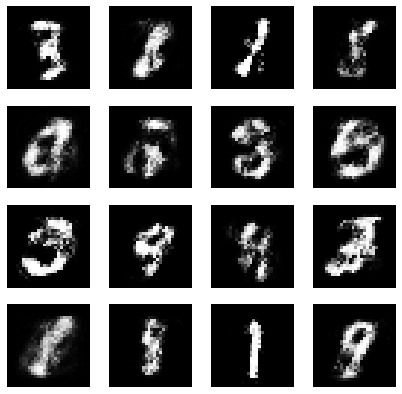

Epoch: 32 | Generator Loss: 1.69197 | Discirminator Loss: 1.02937


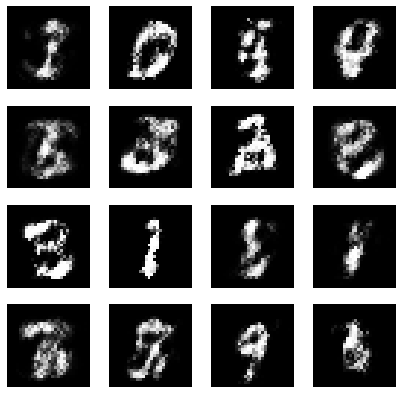

Epoch: 33 | Generator Loss: 1.66462 | Discirminator Loss: 1.04714


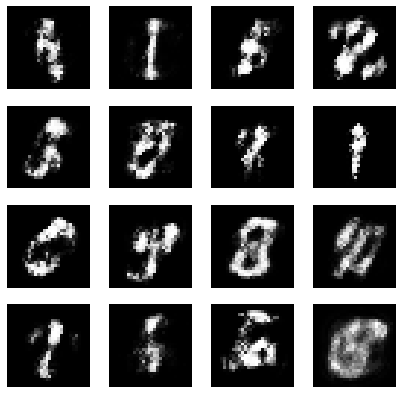

Epoch: 34 | Generator Loss: 1.56317 | Discirminator Loss: 1.03821


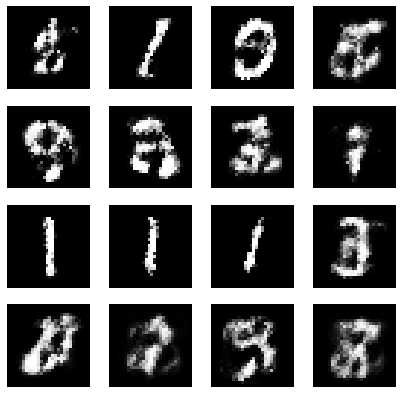

Epoch: 35 | Generator Loss: 1.51149 | Discirminator Loss: 1.06579


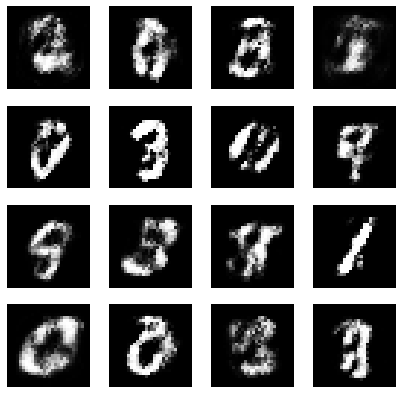

Epoch: 36 | Generator Loss: 1.43252 | Discirminator Loss: 1.06668


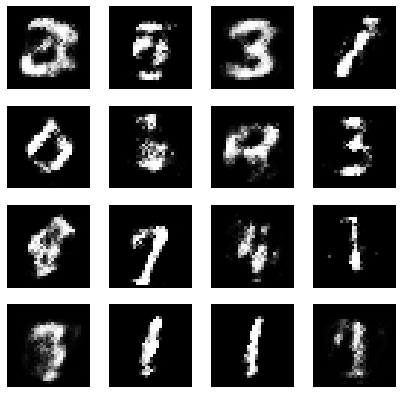

Epoch: 37 | Generator Loss: 1.42799 | Discirminator Loss: 1.03644


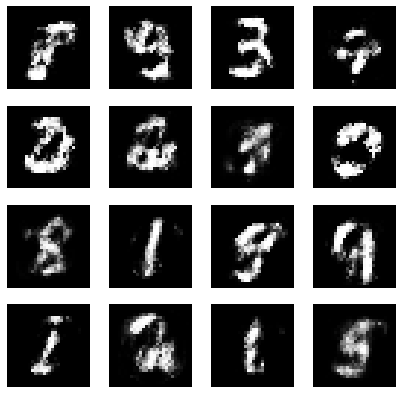

Epoch: 38 | Generator Loss: 1.45932 | Discirminator Loss: 1.00997


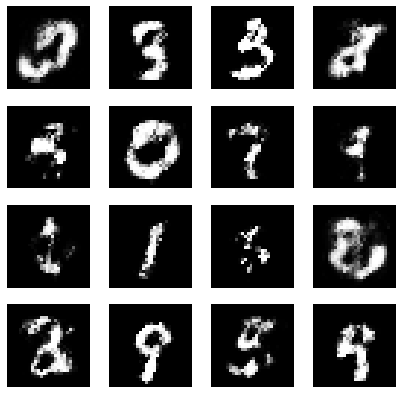

Epoch: 39 | Generator Loss: 1.46482 | Discirminator Loss: 0.98494


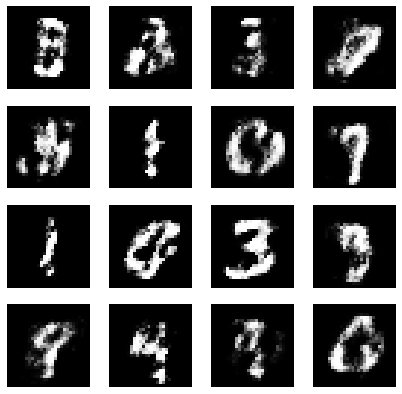

Epoch: 40 | Generator Loss: 1.42915 | Discirminator Loss: 0.99816


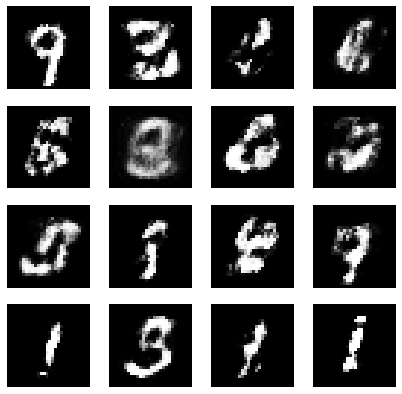

Epoch: 41 | Generator Loss: 1.45079 | Discirminator Loss: 0.97773


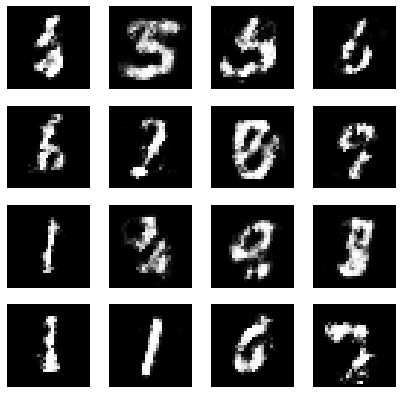

Epoch: 42 | Generator Loss: 1.40982 | Discirminator Loss: 0.98858


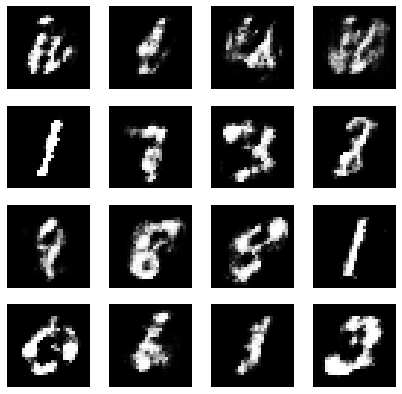

Epoch: 43 | Generator Loss: 1.37909 | Discirminator Loss: 0.99701


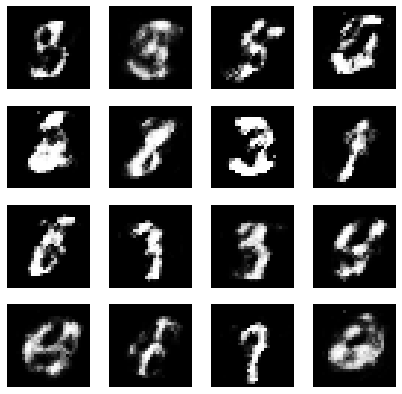

Epoch: 44 | Generator Loss: 1.38232 | Discirminator Loss: 0.98146


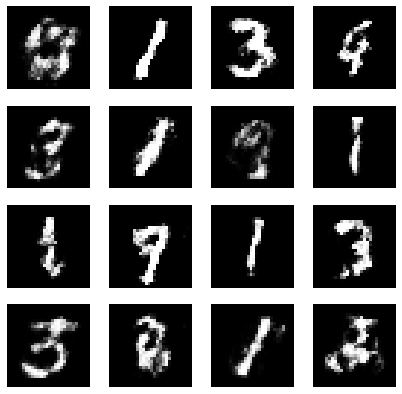

Epoch: 45 | Generator Loss: 1.45430 | Discirminator Loss: 0.97355


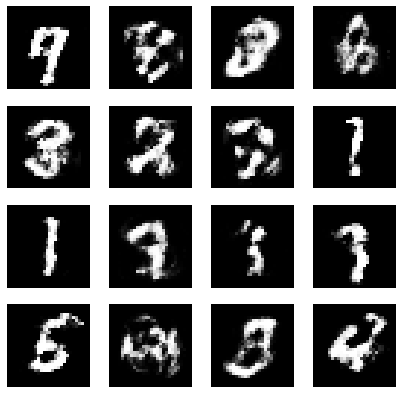

Epoch: 46 | Generator Loss: 1.39698 | Discirminator Loss: 0.98988


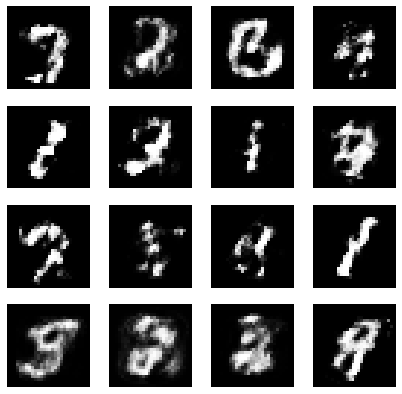

Epoch: 47 | Generator Loss: 1.40587 | Discirminator Loss: 0.97288


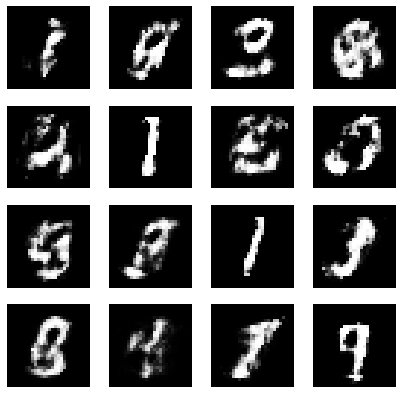

Epoch: 48 | Generator Loss: 1.41424 | Discirminator Loss: 0.97315


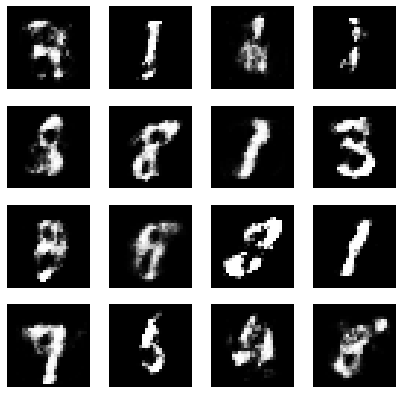

Epoch: 49 | Generator Loss: 1.43857 | Discirminator Loss: 0.96039


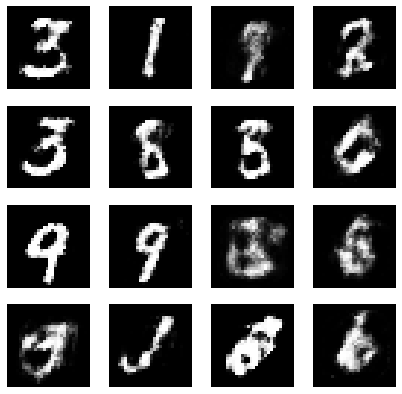

In [14]:
epochs = 50 # a gan usually takes a lot of epochs to work properly
num_batches = 60000//batch_size
learning_rate = 0.001

Glosses = []
Dlosses = []

t = 0
for epoch in range(epochs):
    gcum_loss = 0.0
    dcum_loss = 0.0
    for features in training_data:
        t += 1
        features = features.as_in_context(ctx)
        z = nd.random.normal(0, 1, (features.shape[0], 100)).as_in_context(ctx)
        
        with autograd.record():
            generated = generator(z)
            Gloss = gloss(generated)
        Gloss.backward()
        adam(t, gparams, vs = gvs, sqrs = gsqrs, lr = learning_rate)
        
        with autograd.record():
            generated = generator(z)
            Dloss = dloss(generated, features)
        Dloss.backward()
        adam(t, dparams, vs = dvs, sqrs = dsqrs, lr = learning_rate)
        
        gcum_loss += Gloss
        dcum_loss += Dloss
    
    Gloss = gcum_loss.asscalar()/num_batches
    Dloss = dcum_loss.asscalar()/num_batches
    
    Glosses.append(Gloss)
    Dlosses.append(Dloss)
    
    print(f'Epoch: {epoch} | Generator Loss: {Gloss:.5f} | Discirminator Loss: {Dloss:.5f}')
    
    plt.figure(figsize = (7, 7))
    for i, image in enumerate(generated[:16], 1):
        plt.subplot(4, 4, i)
        plt.imshow(image.reshape((28, 28)).asnumpy(), cmap = 'gray')
        plt.axis('off')
    plt.show()

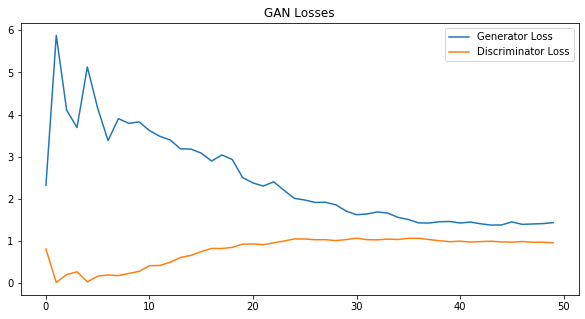

In [15]:
plt.figure(figsize = (10, 5))
plt.plot(Glosses, label = 'Generator Loss')
plt.plot(Dlosses, label = 'Discriminator Loss')
plt.legend()
plt.title('GAN Losses')
plt.show()